In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from os import path
import cv2

from ultralytics import YOLO

In [ ]:
#### Get urls for new images
not_annotated_images = pd.read_csv("Additionnal_images/croppie2.csv", sep=";")
print(not_annotated_images["Arbol_1_rama_1_foto1_URL"])

print(not_annotated_images)


In [ ]:
all_new_images_str = "\n".join(not_annotated_images["Arbol_1_rama_1_foto1_URL"])
f = open("Additionnal_images/urls2.txt", "w")
f.write(all_new_images_str)
f.close()

##### GET IMAGES
# wget -i urls.txt --user=XXXXX and --password=XXXXX

###### RENAME ALL
#a=1
#for i in *.jpg; do
#  new=$(printf "%04d.jpg" "$a") #04 pad to length of 4
#  mv -i -- "$i" "$new"
#  let a=a+1
#done

In [ ]:
import os
from os import path

import cv2
from ultralytics import YOLO

In [ ]:

additionnal_images_path = "Additionnal_images"
model = YOLO("/home/mseurin/Documents/Code/coffee_detection/results/train5_1024only/weights/best.pt") 

all_images = os.listdir(additionnal_images_path)
all_images.sort()


for i, image_path in enumerate(all_images):
    if image_path[-3:] != "jpg":
        continue

    image_full_path = path.join(additionnal_images_path, image_path)
    
    pred = model.predict(image_full_path, save=True, show_labels=False, show_conf=False, line_thickness=1)#, boxes=False)

    #if i > 30:
    #    break




In [ ]:
model = YOLO("/home/mseurin/Documents/Code/coffee_detection/results/train_200_lr0.005/weights/best.pt") 

all_images = os.listdir(additionnal_images_path)


for i, image_path in enumerate():
    if image_path[-3:] != "jpg":
        continue

    image_full_path = path.join(additionnal_images_path, image_path)
    
    pred = model.predict(image_full_path, save=True, show_labels=False, show_conf=False, line_thickness=1)#, boxes=False)

    #if i > 30:
    #    break




In [ ]:
model = YOLO("/home/mseurin/Documents/Code/coffee_detection/results/train_200_lr0_005_sz1024/weights/best.pt") 

additionnal_images_path = "Romain_images"
all_images = os.listdir(additionnal_images_path)


for i, image_path in enumerate(all_images):
    if image_path[-3:] != "jpg":
        continue

    image_full_path = path.join(additionnal_images_path, image_path)
    
    pred = model.predict(image_full_path, save=True, show_labels=False, show_conf=False, line_thickness=1)#, boxes=False)

    #if i > 30:
    #    break




In [ ]:
model = YOLO("/home/mseurin/Documents/Code/coffee_detection/results/train_cropped_l_model/weights/best.pt") 

additionnal_images_path = "Additionnal_images"
all_images = os.listdir(additionnal_images_path)


for i, image_path in enumerate(all_images):
    if image_path[-3:] != "jpg":
        continue

    image_full_path = path.join(additionnal_images_path, image_path)
    
    pred = model.predict(image_full_path, save=True, show_labels=False, show_conf=False, line_thickness=1, iou=0.85)#, boxes=False)

    #if i > 30:
    #    break




In [ ]:
model = YOLO("/home/mseurin/Documents/Code/coffee_detection/results/train_cropped_m_1024/weights/best.pt") 

additionnal_images_path = "Additionnal_images"
all_images = os.listdir(additionnal_images_path)


for i, image_path in enumerate(all_images):
    if image_path[-3:] != "jpg":
        continue

    image_full_path = path.join(additionnal_images_path, image_path)
    
    pred = model.predict(image_full_path, save=True, show_labels=False, show_conf=False, line_thickness=1, iou=0.85)#, boxes=False)

    #if i > 30:
    #    break




In [ ]:
model = YOLO("/home/mseurin/Documents/Code/coffee_detection/results/train_crop_m_bigger_augment/weights/best.pt") 

additionnal_images_path = "Additionnal_images"
all_images = os.listdir(additionnal_images_path)


for i, image_path in enumerate(all_images):
    if image_path[-3:] != "jpg":
        continue

    image_full_path = path.join(additionnal_images_path, image_path)
    
    pred = model.predict(image_full_path, save=True, show_labels=False, show_conf=False, line_thickness=1, iou=0.92)#, boxes=False)

    #if i > 30:
    #    break




In [ ]:
import subprocess

def runcmd(cmd, verbose = False, *args, **kwargs):

    process = subprocess.Popen(
        cmd,
        stdout = subprocess.PIPE,
        stderr = subprocess.PIPE,
        text = True,
        shell = True
    )
    std_out, std_err = process.communicate()
    if verbose:
        print(std_out.strip(), std_err)
    pass


additionnal_images_path = "Additionnal_images/"

all_new_images_str = not_annotated_images["Arbol_1_rama_1_foto1_URL"]
line_indexes = not_annotated_images["_id"]


for i, (img_url, line_index) in enumerate(zip(all_new_images_str, line_indexes)):
    #print(img_url, line_index)
    runcmd(f"wget -c {img_url} -O {additionnal_images_path}/{line_index}.jpg --user=ciat2022 --password=ciat2022")

In [ ]:
count_cerezas = not_annotated_images["Arbol_1_rama_1"]
additionnal_images_path = "Additionnal_images/"
line_indexes = not_annotated_images["_id"]

model = YOLO("/home/mseurin/Documents/Code/coffee_detection/results/train_crop_m_bigger_augment/weights/best.pt")

to_show = {225674264, 225674652, 225674855, 225898524, 226561255, 226561268, 225695493, 225898524}


for i, (count, image_id) in enumerate(zip(count_cerezas, line_indexes)):

    img_path = path.join(additionnal_images_path, str(image_id)) + ".jpg"
    print(img_path)

    img = cv2.imread(img_path)
    
    if img is None and image_id not in to_show:
        continue


    prediction = model.predict(img, show_labels=False, show_conf=False, line_thickness=1, iou=0.92)#, boxes=False)    
    amount_predict = len(prediction[0].boxes)

    plt.imshow(img)
    plt.title(f"amount_predict {amount_predict}, true count {count}")
    plt.show()
    
    if i > 10:
        break




In [64]:
import time

def test_model_against_csv(pd_data, model):

    count_cerezas = pd_data["Arbol_1_rama_1"]
    additionnal_images_path = "Additionnal_images/"
    line_indexes = pd_data["_id"]

    ignored = 0
    n_test = 0
    abs_error = 0
    total_count = 0
    perc_error 

    for i, (count, image_id) in enumerate(zip(count_cerezas, line_indexes)):

        img_path = path.join(additionnal_images_path, str(image_id)) + ".jpg"
        img = cv2.imread(img_path)
        
        if img is None:
            ignored += 1
            continue


        prediction = model.predict(img, save=False, show_labels=False, show_conf=False, line_thickness=1, iou=0.90)#, boxes=False)    
        amount_predict = len(prediction[0].boxes)

        n_test += 1
        abs_error += abs(amount_predict - count)
        
        perc_error += abs(amount_predict - count) / count


        total_count += count


    time.sleep(2)
    print(f"ignored {ignored}")
    #print(f"Total error : {abs_error}, Mean Error {abs_error / n_test}")

    return abs_error, n_test, perc_error


model = YOLO("/home/mseurin/Documents/Code/coffee_detection/results/train_crop_m_bigger_augment/weights/best.pt")
model2 = YOLO("/home/mseurin/Documents/Code/coffee_detection/results/train_200_lr0_005_sz1024/weights/best.pt")


test_images = pd.read_csv("Additionnal_images/croppie_not_annotated_images.csv", sep=";")

model1_abs_error, n_test, perc_error1 = test_model_against_csv(test_images, model)
model2_abs_error, n_test, perc_error2 = test_model_against_csv(test_images, model2)



0: 1024x768 48 cafe verdes, 38.6ms
Speed: 0.6ms preprocess, 38.6ms inference, 1.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x768 16 cafe verdes, 39.7ms
Speed: 0.7ms preprocess, 39.7ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x800 28 cafe verdes, 38.0ms
Speed: 0.8ms preprocess, 38.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 800x1024 17 cafe verdes, 34.9ms
Speed: 0.8ms preprocess, 34.9ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x768 42 cafe verdes, 34.0ms
Speed: 0.8ms preprocess, 34.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x768 16 cafe verdes, 32.2ms
Speed: 0.7ms preprocess, 32.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x768 12 cafe verdes, 32.5ms
Speed: 0.7ms preprocess, 32.5ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x768 17 cafe verdes, 32.8ms
Speed: 0.7ms prepro

ignored 3



0: 1024x768 61 cafe verdes, 39.8ms
Speed: 0.7ms preprocess, 39.8ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x768 25 cafe verdes, 39.7ms
Speed: 0.8ms preprocess, 39.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x800 24 cafe verdes, 40.9ms
Speed: 0.8ms preprocess, 40.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 800x1024 27 cafe verdes, 35.3ms
Speed: 0.8ms preprocess, 35.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x768 45 cafe verdes, 34.7ms
Speed: 0.7ms preprocess, 34.7ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x768 17 cafe verdes, 32.6ms
Speed: 0.8ms preprocess, 32.6ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x768 22 cafe verdes, 33.2ms
Speed: 0.8ms preprocess, 33.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x768 18 cafe verdes, 33.7ms
Speed: 0.7ms prepro

ignored 3


In [65]:
mean1 = model1_abs_error / n_test
mean2 = model2_abs_error / n_test

mean_perc_error1 = perc_error1 / n_test
mean_perc_error2 = perc_error1 / n_test


print(f"new model {mean1}, {perc_error1}abs {model1_abs_error}, total_img {n_test}")# vs old_model {mean2}")
print(f"old model {mean2}, abs {model2_abs_error}, total_img {n_test}")# vs old_model {mean2}")




new model 16.443946188340806, abs 3667, total_img 223
old model 19.533632286995516, abs 4356, total_img 223


(1024, 576, 3)



0: 1024x1024 8 cafe verdes, 49.9ms
Speed: 4.4ms preprocess, 49.9ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict20
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


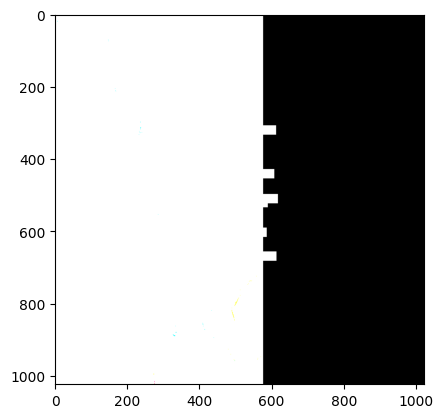


0: 1024x1024 1 cafe verde, 41.1ms
Speed: 4.4ms preprocess, 41.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict20
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(600, 800, 3)


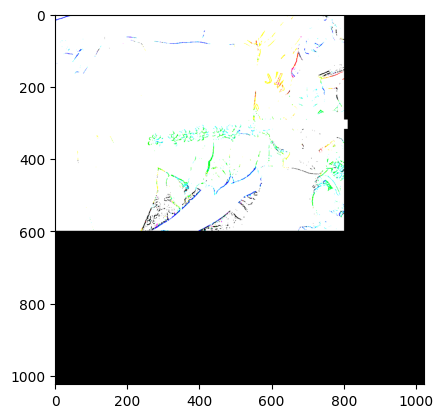


0: 1024x1024 1 cafe verde, 41.7ms
Speed: 4.4ms preprocess, 41.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict20
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(600, 800, 3)


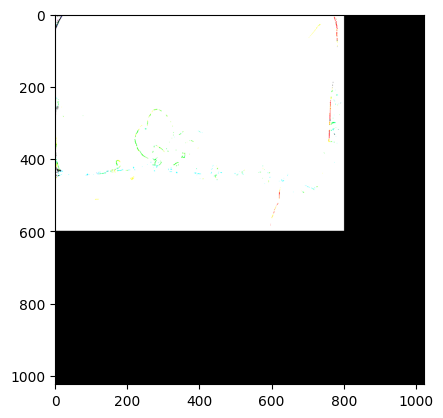


0: 1024x1024 4 cafe verdes, 41.0ms
Speed: 4.4ms preprocess, 41.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict20
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(800, 600, 3)


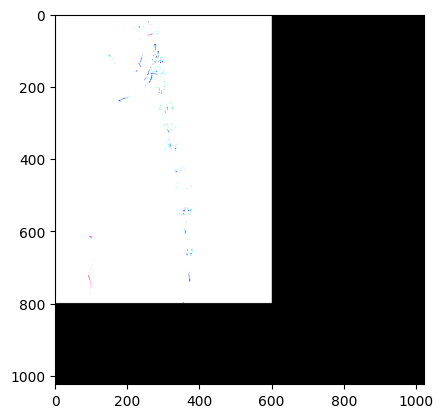


0: 1024x1024 1 cafe verde, 40.6ms
Speed: 4.4ms preprocess, 40.6ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict20
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(800, 600, 3)


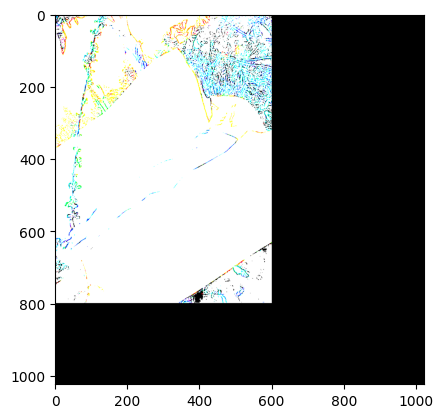


0: 1024x1024 1 cafe verde, 41.3ms
Speed: 4.4ms preprocess, 41.3ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict20
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(800, 600, 3)


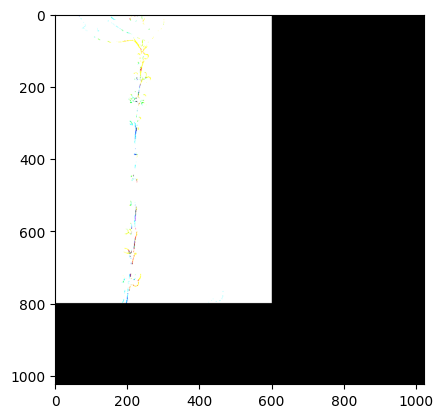


0: 1024x1024 (no detections), 40.1ms
Speed: 4.4ms preprocess, 40.1ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict20
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(600, 800, 3)


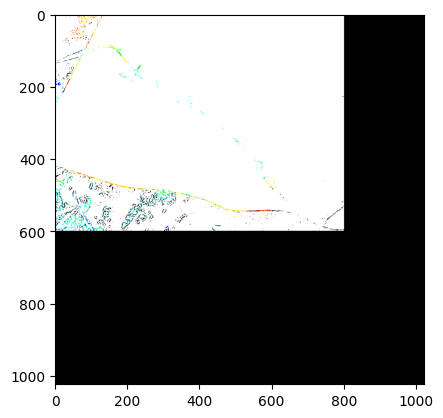


0: 1024x1024 1 cafe verde, 46.8ms
Speed: 4.4ms preprocess, 46.8ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict20
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(600, 800, 3)


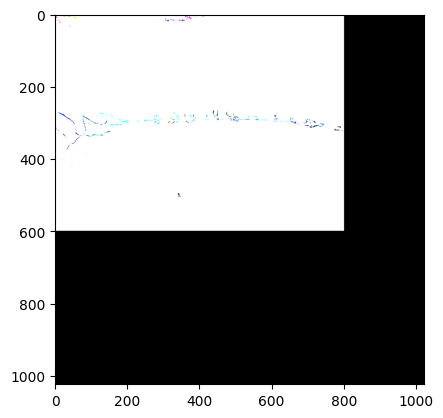


0: 1024x1024 9 cafe verdes, 48.0ms
Speed: 4.4ms preprocess, 48.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict20
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(600, 800, 3)


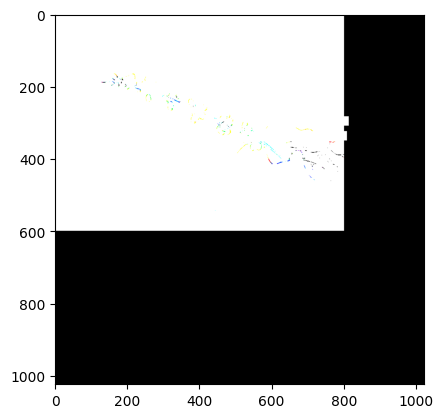


0: 1024x1024 (no detections), 50.4ms
Speed: 4.4ms preprocess, 50.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict20
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(600, 800, 3)


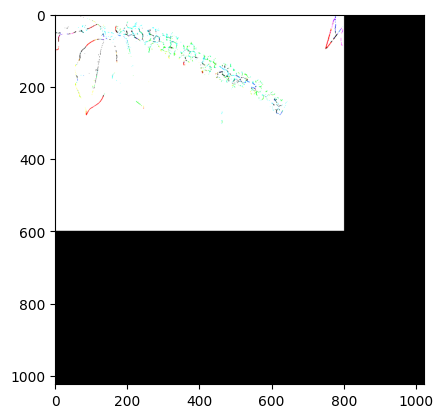


0: 1024x1024 16 cafe verdes, 50.7ms
Speed: 4.4ms preprocess, 50.7ms inference, 1.8ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict20
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(600, 800, 3)


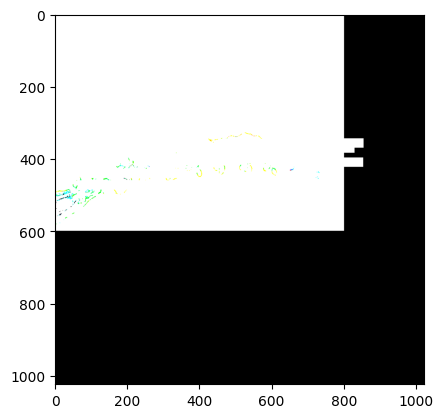


0: 1024x1024 (no detections), 49.8ms
Speed: 4.5ms preprocess, 49.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict20
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(800, 600, 3)


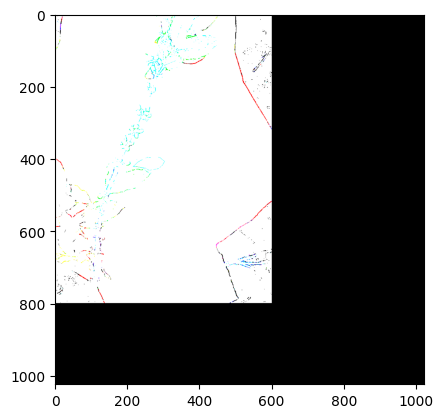


0: 1024x1024 4 cafe verdes, 49.1ms
Speed: 4.7ms preprocess, 49.1ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict20
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(800, 600, 3)


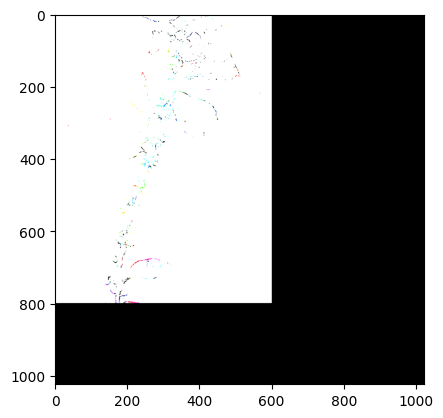


0: 1024x1024 10 cafe verdes, 50.9ms
Speed: 4.4ms preprocess, 50.9ms inference, 2.1ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict20
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1024, 768, 3)


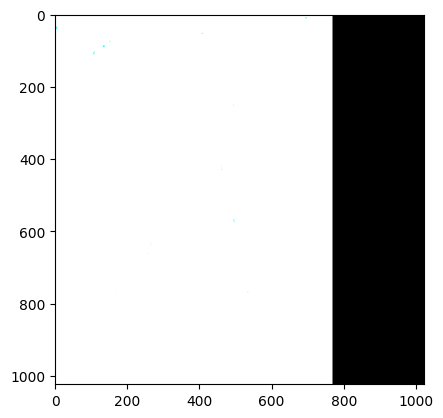


0: 1024x1024 8 cafe verdes, 50.4ms
Speed: 4.7ms preprocess, 50.4ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict20
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(768, 1024, 3)


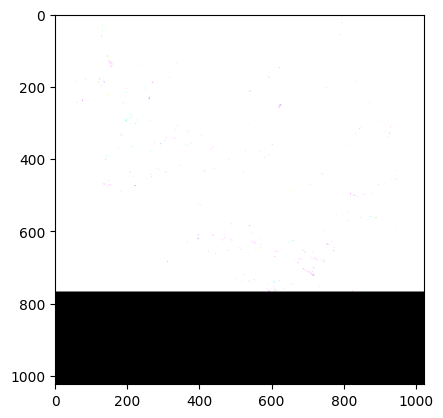


0: 1024x1024 10 cafe verdes, 49.4ms
Speed: 4.5ms preprocess, 49.4ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict20
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1024, 576, 3)


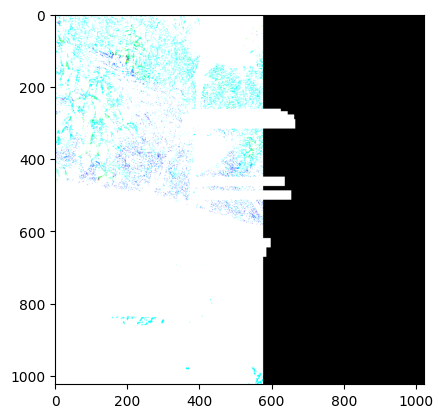


0: 1024x1024 16 cafe verdes, 50.8ms
Speed: 4.4ms preprocess, 50.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict20
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1024, 576, 3)


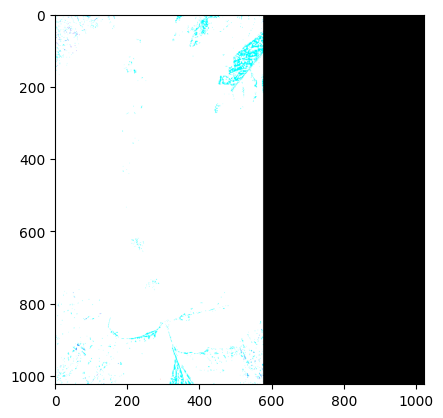


0: 1024x1024 (no detections), 51.3ms
Speed: 4.6ms preprocess, 51.3ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict20
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1024, 768, 3)


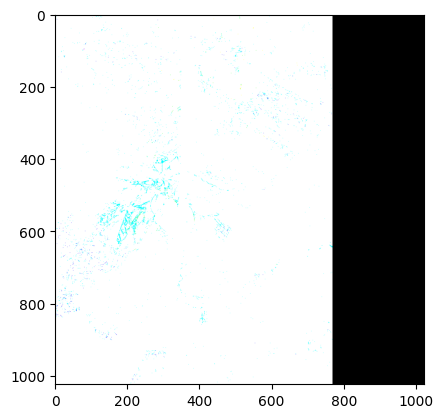


image 1/1 /home/mseurin/Documents/Code/coffee_detection/coffee_raw/Imagenes/1615223586835.jpg: 1024x768 23 cafe verdes, 39.8ms
Speed: 0.8ms preprocess, 39.8ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


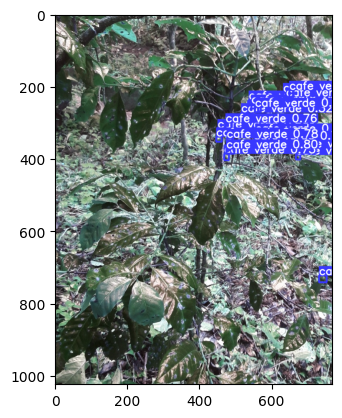

In [56]:
############### HARD IMAGES ROMAIN ##########
#############################################
import numpy as np

additionnal_images_path = "hard_test_2_mathieu"

model = YOLO("/home/mseurin/Documents/Code/coffee_detection/results/train_200_lr0_005_sz1024/weights/best.pt")
#model = YOLO("/home/mseurin/Documents/Code/coffee_detection/results/train_crop_m_bigger_augment/weights/best.pt")


all_images = os.listdir(additionnal_images_path)
all_images.sort()


for i, image_path in enumerate(all_images):
    if image_path[-3:] != "jpg" or 'out' in image_path or 'p.jpg' in image_path:
        continue

    image_full_path = path.join(additionnal_images_path, image_path)
    img = cv2.imread(image_full_path)
    
    new_img = np.zeros((1024,1024,3), dtype=float)
    new_img[0:img.shape[0], 0:img.shape[1]] = img

    print(img.shape)
    
    pred = model.predict(new_img, save=True, show=False, show_labels=False, show_conf=False, line_thickness=1)#, boxes=False)
    plt.imshow(pred[0].plot())
    plt.show()

    #if i > 30:
    #    break

